<h1 style="border: 2px solid green; border-radius: 8px; padding: 8px; text-align: center;"> Statistics for Data Science </h1>

In [571]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

In [572]:
data = pd.read_csv("./data_science_projects.csv")

In [573]:
data

,Name,p_2023,p_2022,p_2021
0,Jake Vanderplas,1691,1559,1530
1,Kaihua Huang,0,0,1
2,Donne Martin,585,667,569
3,Joel Grus,490,26,31
4,Will Koehrsen,29,6,77
5,Ujjwal Karn,0,1,3
6,Huang Haiguang,10,24,77
7,Nitin Borwankar,1,2,10
8,Keith Galli,36,61,11
9,Yu Wu,2,0,0


- Normalize the dataset to the range [0,1] and discretize it into three ranges by replacing the original values with the centers of the respective ranges.

In [574]:
scaler = MinMaxScaler()
columns_to_normalize = ["p_2023", "p_2022", "p_2021"]
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

In [575]:
data

,Name,p_2023,p_2022,p_2021
0,Jake Vanderplas,1.000000,1.000000,1.000000
1,Kaihua Huang,0.000000,0.000000,0.000654
2,Donne Martin,0.345949,0.427838,0.371895
3,Joel Grus,0.289769,0.016677,0.020261
4,Will Koehrsen,0.017150,0.003849,0.050327
5,Ujjwal Karn,0.000000,0.000641,0.001961
6,Huang Haiguang,0.005914,0.015394,0.050327
7,Nitin Borwankar,0.000591,0.001283,0.006536
8,Keith Galli,0.021289,0.039128,0.007190
9,Yu Wu,0.001183,0.000000,0.000000


In [576]:
ranges = [(0, 0.33), (0.33, 0.66), (0.66, 1.0)]
for column in columns_to_normalize:
    data[column] = np.digitize(
        data[column], [range_end for _, range_end in ranges], right=True
    )
    data[column] = [
        ((ranges[int(i)][1] - ranges[int(i)][0]) / 2) + ranges[int(i)][0]
        for i in data[column]
    ]

In [577]:
data

,Name,p_2023,p_2022,p_2021
0,Jake Vanderplas,0.830,0.830,0.830
1,Kaihua Huang,0.165,0.165,0.165
2,Donne Martin,0.495,0.495,0.495
3,Joel Grus,0.165,0.165,0.165
4,Will Koehrsen,0.165,0.165,0.165
5,Ujjwal Karn,0.165,0.165,0.165
6,Huang Haiguang,0.165,0.165,0.165
7,Nitin Borwankar,0.165,0.165,0.165
8,Keith Galli,0.165,0.165,0.165
9,Yu Wu,0.165,0.165,0.165


- Create a scatter plot using the data from 2023 and 2022 (p. 2023, p. 2022).

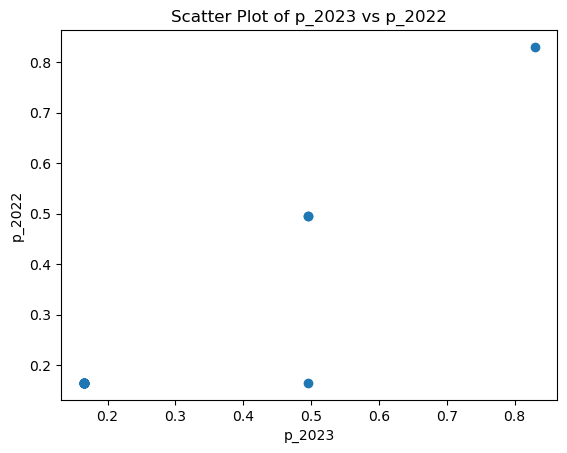

In [578]:
plt.scatter(data["p_2023"], data["p_2022"])
plt.xlabel("p_2023")
plt.ylabel("p_2022")
plt.title("Scatter Plot of p_2023 vs p_2022")
plt.show()

- Create a scatter plot using the data from 2023, 2022, and 2021 (p. 2023, p. 2022, p. 2021).

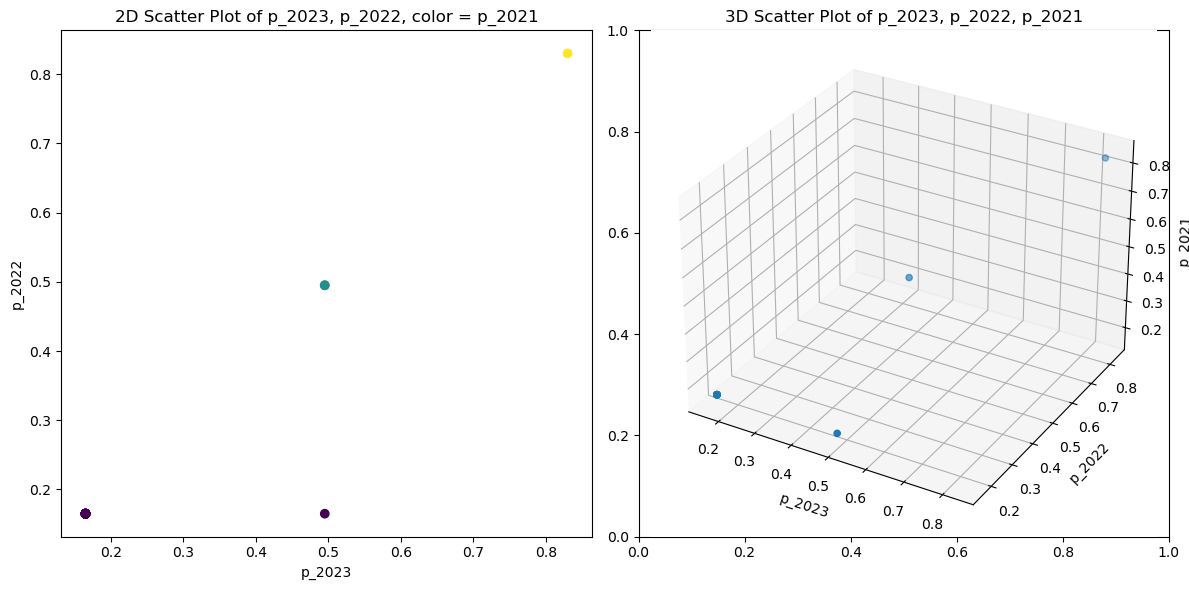

In [579]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot 2D scatter
ax1.scatter(data["p_2023"], data["p_2022"], c=data["p_2021"])
ax1.set_xlabel("p_2023")
ax1.set_ylabel("p_2022")
ax1.set_title("2D Scatter Plot of p_2023, p_2022, color = p_2021")

# Plot 3D scatter
ax2 = fig.add_subplot(122, projection="3d")
ax2.scatter(data["p_2023"], data["p_2022"], data["p_2021"])
ax2.set_xlabel("p_2023")
ax2.set_ylabel("p_2022")
ax2.set_zlabel("p_2021")
ax2.set_title("3D Scatter Plot of p_2023, p_2022, p_2021")

plt.tight_layout()
plt.show()

- Write a Python function that returns an array representing the joint distribution of variables from 2023 and 2022, as well as the joint distribution of variables from 2022 and 2021, and the joint distribution of variables from 2021, 2022, and 2023 (p. 2023, p. 2022, p. 2021).

In [580]:
def calculate_joint_probability_distribution(data, columns):
    data_subset = data[columns]
    joint_prob_dist = data_subset.groupby(columns).size().reset_index(name="count")
    total_count = joint_prob_dist["count"].sum()
    joint_prob_dist["probability"] = joint_prob_dist["count"] / total_count

    return joint_prob_dist

In [581]:
columns_1 = ["p_2023", "p_2022"]
columns_2 = ["p_2022", "p_2021"]
columns_3 = ["p_2021", "p_2022", "p_2023"]

joint_prob_dist_1 = calculate_joint_probability_distribution(data, columns_1)
joint_prob_dist_2 = calculate_joint_probability_distribution(data, columns_2)
joint_prob_dist_3 = calculate_joint_probability_distribution(data, columns_3)

In [582]:
print("Joint Probability Distribution (p_2023, p_2022):")
joint_prob_dist_1

Joint Probability Distribution (p_2023, p_2022):


,p_2023,p_2022,count,probability
0,0.165,0.165,26,0.866667
1,0.495,0.165,1,0.033333
2,0.495,0.495,2,0.066667
3,0.830,0.830,1,0.033333


In [583]:
print("Joint Probability Distribution (p_2022, p_2021):")
joint_prob_dist_2

Joint Probability Distribution (p_2022, p_2021):


,p_2022,p_2021,count,probability
0,0.165,0.165,27,0.900000
1,0.495,0.495,2,0.066667
2,0.830,0.830,1,0.033333


In [584]:
print("Joint Probability Distribution (p_2021, p_2022, p_2023):")
joint_prob_dist_3

Joint Probability Distribution (p_2021, p_2022, p_2023):


,p_2021,p_2022,p_2023,count,probability
0,0.165,0.165,0.165,26,0.866667
1,0.165,0.165,0.495,1,0.033333
2,0.495,0.495,0.495,2,0.066667
3,0.830,0.830,0.830,1,0.033333


- Plot the scatter plots of the joint distributions.

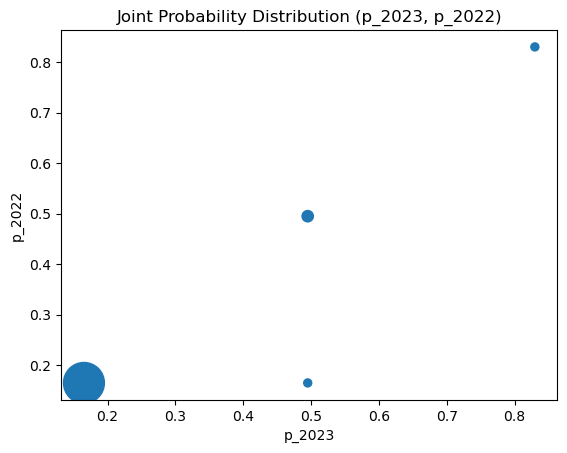

In [585]:
plt.scatter(joint_prob_dist_1['p_2023'], joint_prob_dist_1['p_2022'], s=joint_prob_dist_1['probability']*1000)
plt.xlabel('p_2023')
plt.ylabel('p_2022')
plt.title('Joint Probability Distribution (p_2023, p_2022)')
plt.show()

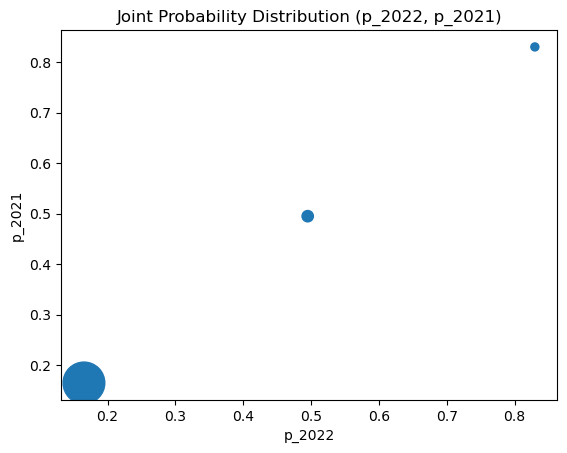

In [586]:
plt.scatter(joint_prob_dist_2['p_2022'], joint_prob_dist_2['p_2021'], s=joint_prob_dist_2['probability']*1000)
plt.xlabel('p_2022')
plt.ylabel('p_2021')
plt.title('Joint Probability Distribution (p_2022, p_2021)')
plt.show()

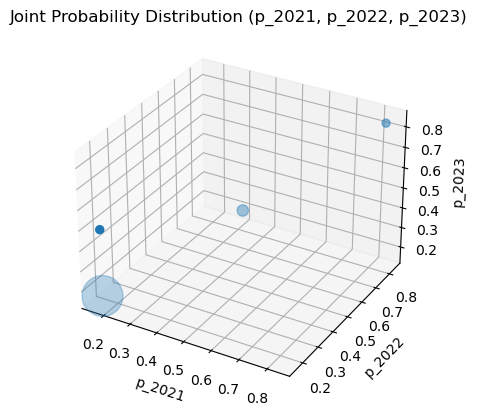

In [587]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(joint_prob_dist_3['p_2021'], joint_prob_dist_3['p_2022'], joint_prob_dist_3['p_2023'], s=joint_prob_dist_3['probability']*1000)
ax.set_xlabel('p_2021')
ax.set_ylabel('p_2022')
ax.set_zlabel('p_2023')
ax.set_title('Joint Probability Distribution (p_2021, p_2022, p_2023)')
plt.show()

- Write a function that returns an array representing the marginal distribution of a given variable.

In [588]:
calculate_marginal_probability_distribution = (
    lambda joint_prob_dist, variable: joint_prob_dist.groupby(variable)["probability"]
    .sum()
    .reset_index()
)

In [589]:
marginal_prob_dist_p_2021 = calculate_marginal_probability_distribution(joint_prob_dist_3, "p_2021")

In [590]:
marginal_prob_dist_p_2021

,p_2021,probability
0,0.165,0.900000
1,0.495,0.066667
2,0.830,0.033333


In [591]:
marginal_prob_dist_p_2022 = calculate_marginal_probability_distribution(joint_prob_dist_3, "p_2022")

In [592]:
marginal_prob_dist_p_2022

,p_2022,probability
0,0.165,0.900000
1,0.495,0.066667
2,0.830,0.033333


In [593]:
marginal_prob_dist_p_2023 = calculate_marginal_probability_distribution(joint_prob_dist_3, "p_2023")

In [594]:
marginal_prob_dist_p_2023

,p_2023,probability
0,0.165,0.866667
1,0.495,0.100000
2,0.830,0.033333


- Plot the histogram of the marginal distribution.

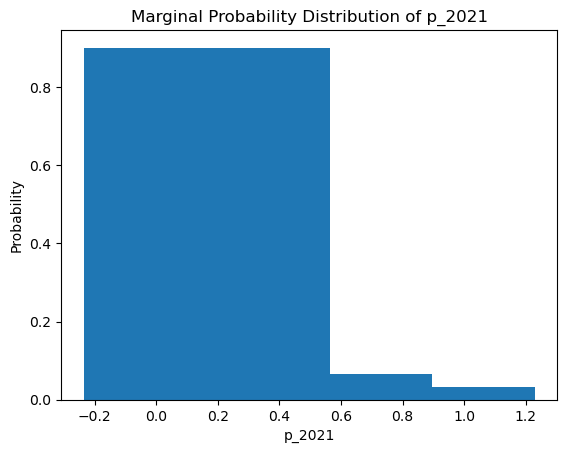

In [595]:
plt.bar(marginal_prob_dist_p_2021["p_2021"], marginal_prob_dist_p_2021["probability"])
plt.xlabel("p_2021")
plt.ylabel("Probability")
plt.title("Marginal Probability Distribution of " + "p_2021")
plt.show()

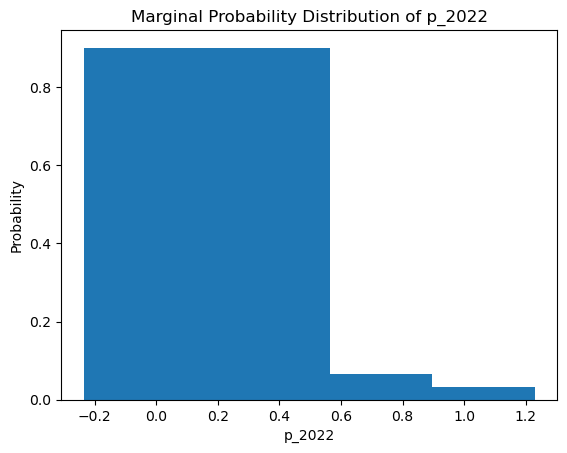

In [596]:
plt.bar(marginal_prob_dist_p_2022["p_2022"], marginal_prob_dist_p_2022["probability"])
plt.xlabel("p_2022")
plt.ylabel("Probability")
plt.title("Marginal Probability Distribution of " + "p_2022")
plt.show()

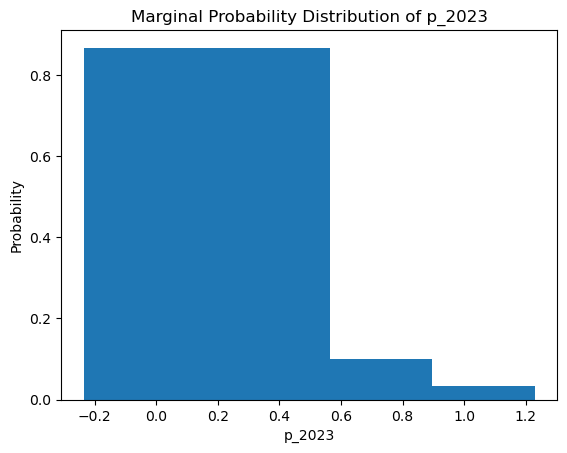

In [597]:
plt.bar(marginal_prob_dist_p_2023["p_2023"], marginal_prob_dist_p_2023["probability"])
plt.xlabel("p_2023")
plt.ylabel("Probability")
plt.title("Marginal Probability Distribution of " + "p_2023")
plt.show()

In [598]:
def check_variable_independence(data, variable1, variable2):
    joint_prob_dist = calculate_joint_probability_distribution(
        data, [variable1, variable2]
    )
    marginal_prob_dist1 = calculate_marginal_probability_distribution(
        joint_prob_dist, variable1
    )
    marginal_prob_dist2 = calculate_marginal_probability_distribution(
        joint_prob_dist, variable2
    )

    for x, y in zip(joint_prob_dist[variable1], joint_prob_dist[variable2]):
        marginal_prob1 = marginal_prob_dist1[marginal_prob_dist1[variable1] == x][
            "probability"
        ].iloc[0]
        marginal_prob2 = marginal_prob_dist2[marginal_prob_dist2[variable2] == y][
            "probability"
        ].iloc[0]
        joint_prob = joint_prob_dist[
            np.logical_and(
                joint_prob_dist[variable1] == x, joint_prob_dist[variable2] == y
            )
        ]["probability"].iloc[0]

        if marginal_prob1 * marginal_prob2 != joint_prob:
            return False

    return True

- Write a function that checks the independence of variables.

In [599]:
variable1 = "p_2022"
variable2 = "p_2021"

independence_result = check_variable_independence(data, variable1, variable2)
if independence_result:
    print(f"The variables {variable1} and {variable2} are independent.")
else:
    print(f"The variables {variable1} and {variable2} are dependent.")

The variables p_2022 and p_2021 are dependent.


- Using the marginal distributions and joint probabilities, write a function that calculates the variance-covariance matrix and correlation coefficients.

In [600]:
def calculate_covariance(x, y):
    n = len(x)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    covariance = np.sum((x - mean_x) * (y - mean_y)) / (n - 1)
    return covariance


def calculate_variance_covariance_matrix(data, variables):
    covariance_matrix = np.zeros((len(variables), len(variables)))

    for i in range(len(variables)):
        for j in range(len(variables)):
            covariance_matrix[i, j] = calculate_covariance(
                data[variables[i]].to_numpy(), data[variables[j]].to_numpy()
            )

    return covariance_matrix


def calculate_correlation_coefficients(variance_covariance_matrix):
    correlation_matrix = np.zeros_like(variance_covariance_matrix)

    for i in range(len(variance_covariance_matrix)):
        for j in range(len(variance_covariance_matrix)):
            correlation_matrix[i, j] = variance_covariance_matrix[i, j] / np.sqrt(
                variance_covariance_matrix[i, i] * variance_covariance_matrix[j, j]
            )

    return correlation_matrix

In [601]:
variables = ["p_2021", "p_2022", "p_2023"]
covariance_matrix = calculate_variance_covariance_matrix(data, variables)
correlation_matrix = calculate_correlation_coefficients(covariance_matrix)

In [602]:
print("Covariance Matrix:")
pd.DataFrame(covariance_matrix)

Covariance Matrix:


,0,1,2
0,0.020742,0.020742,0.020239
1,0.020742,0.020742,0.020239
2,0.020239,0.020239,0.023366


In [603]:
print("\nCorrelation Matrix:")
pd.DataFrame(correlation_matrix)


Correlation Matrix:


,0,1,2
0,1.000000,1.000000,0.919331
1,1.000000,1.000000,0.919331
2,0.919331,0.919331,1.000000
